In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import os
# To make grid of images.
from torchvision.utils import make_grid
from torchvision.io import read_image
from PIL import Image

# For drawing bounding boxes.
from torchvision.utils import draw_bounding_boxes
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision import transforms as transforms

from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

# sources:
# PyTorch - https://debuggercafe.com/an-introduction-to-pytorch-visualization-utilities/
# WANDB - https://medium.com/voxel51/visualizing-object-detections-9d0ed766297c

c:\Users\agama\anaconda3\envs\mlops\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
image_1_path = os.path.join('coco_sample', 'image_1.jpg')

detection_threshold = 0.8

In [3]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [6]:
image = Image.open(image_1_path)

processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

c:\Users\agama\anaconda3\envs\mlops\lib\site-packages\transformers\models\detr\image_processing_detr.py:773: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


In [ ]:
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

pred_scores = results['scores'].detach().cpu().numpy()
pred_classes = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in results['labels'].cpu().numpy()]
pred_bboxes = results['boxes'].detach().cpu().numpy()
boxes = pred_bboxes[pred_scores >= detection_threshold].astype(np.int32)
pred_classes = pred_classes[:len(boxes)]

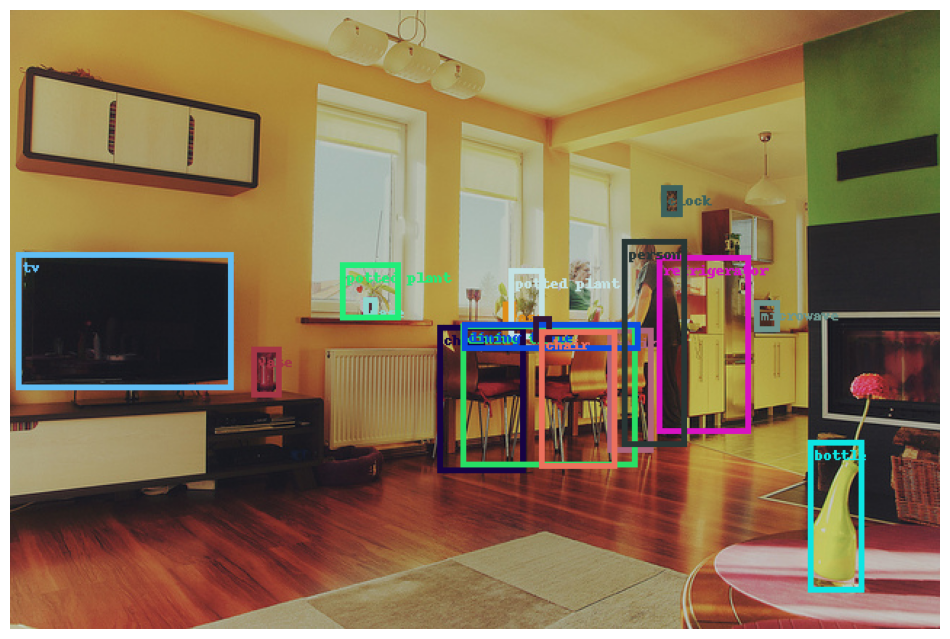

In [ ]:
colors=np.random.randint(0, 255, size=(len(boxes), 3))
colors = [tuple(color) for color in colors]


image_np = np.array(image)
image_transposed = np.transpose(image_np, [2, 0, 1])
# Convert to uint8 tensor.
int_input = torch.tensor(image_transposed)

result_with_boxes = draw_bounding_boxes(
    image=int_input, 
    boxes=torch.tensor(boxes), width=4, 
    colors=colors,
    labels=pred_classes,
    # fill=True
)
show(result_with_boxes)